In [1]:
# show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### In case that your tqdm is not installed. Please go to the Start(Windows)->Anaconda2(64-bit)->Anaconda Prompt(py35)

### type: conda install tqdm -y

In [2]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import os
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import re
import codecs
from collections import Counter
import nltk
from nltk.stem import *
from nltk.corpus import stopwords
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import stats

C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
# extract data
#!tar -xf 20news-19997.tar.gz -C .
#!gzip -d -k 20news-19997.tar.gz

#!tar -xf 20news-19997.tar

In [4]:
# display newsgroups directories
!ls 20_newsgroups

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


## Support functions

In [5]:
def getFilesDirectory(datapath='20_newsgroups'):
    # create file directory for all files
    files = []
    for (path, dirnames, filenames) in os.walk(datapath):
        files.extend(os.path.join(path, name) for name in filenames)
    # putting file directories into pandas dataframe
    directorydf= pd.DataFrame(files)
    directorydf.columns = ['Directories']
    return directorydf

In [6]:
directorydf = getFilesDirectory()

In [7]:
# create function to help encoding the targets
def label_target (d):
    if d.find("alt.atheism") > 0 :
      return 0
    if d.find("comp.graphics") > 0:
      return 1
    if d.find("comp.os.ms-windows.misc") > 0:
      return 2
    if d.find("comp.sys.ibm.pc.hardware") > 0:
      return 3
    if d.find("comp.sys.mac.hardware") > 0:
      return 4
    if d.find("comp.windows.x") > 0:
      return 5
    if d.find("misc.forsale") > 0:
      return 6
    if d.find("rec.autos") > 0:
      return 7
    if d.find("rec.motorcycles") > 0:
      return 8
    if d.find("rec.sport.baseball") > 0:
      return 9
    if d.find("rec.sport.hockey") > 0:
      return 10
    if d.find("sci.crypt") > 0:
      return 11
    if d.find("sci.electronics") > 0:
      return 12
    if d.find("sci.med") > 0:
      return 13
    if d.find("sci.space") > 0:
      return 14
    if d.find("soc.religion.christian") > 0:
      return 15
    if d.find("talk.politics.guns") > 0:
      return 16
    if d.find("talk.politics.mideast") > 0:
      return 17
    if d.find("talk.politics.misc") > 0:
      return 18
    if d.find("talk.religion.misc") > 0:
      return 19
    return 'Other'

## Q1

### (a)

Before feature selection, I have lowercase my data and removed the stopwords to increase the accuracy. Words like "the, a, I" are used frequently in all documents and they are not good features for classification. They should be removed. 

I have used term frequency for the feature selection which is not expensive for large dataset. MI is time consuming and expensive.

Boolean is a better feature encoding. Lenghth of documents varries, and and some words exist in may documents. Therefore, boolean feature encoding may give us a better accuracy; however, it is expensive for large data. 

I have selected 50,100, 150 and 200 features for 2000 documents, 100 features worked well. Therefore, for 20,000 documents I will try 1000 features. 

In [8]:
#directorydf_selected= directorydf.iloc[0:20000:100, :]
#directorydf_selected.head()
#type (directorydf)
#print (directorydf.columns)
#directorydf.head()

In [9]:
#for rownum, row in enumerate(directorydf_selected.itertuples()):
#    with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
#        tokens=[word for word in re.findall(r'\w+', myfile.read())]
#        list_of_words = [i.lower() for i in tokens if i.lower() not in stopwords.words('english')]
#        print (list_of_words) 

### (b)

In [50]:
def dataPreprocessor(k, fs, encode, directorydf, size=None):
    """
    INPUT
        k: int. number of features to use
        fs: string. From ['tf', 'mi']
        encode: string. From ['tf', 'boolean']
        drectorydf: Dataframe. It is given, see above support functions
        size: int. Sample size. Default should be the data size.
    OUTPUT
        data: Dataframe. preprocessed data
    
    ps: 'tf' means term frequency, 'mi' means mutual information
    """

    nltk.download("stopwords")
    #stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}']) # remove it if you need punctuation 

    directorydf= directorydf.iloc[:, :]
    ########### your code goes here ###########
    # Open the files and count the word frequency in each file in a loop and update the counter after finished processing a file
    
    counter = Counter()
    for rownum, row in enumerate(directorydf.itertuples()):
        with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
            tokens=[word for word in re.findall(r'\w+', myfile.read())]
            list_of_words = [i.lower() for i in tokens if i.lower() not in stopwords.words('english')]
           
            counter.update(list_of_words)
        if (rownum % 1000 == 0):
            print("processed %d files" % (rownum+1))
    
    topk = counter.most_common(k)     
            
    if encode== "boolean":
        np = []
    # now we had top k words, count the frequecy (binary) of these words in individual file
        for rownum, row in enumerate(directorydf.itertuples()):
            with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
                tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
        # if the word appears in the doc, then 1, else 
                topkinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        # create a list for top k words with encoded target and its label
                np.append(topkinDoc+[label_target(row.Directories)]+[row.Directories])
                if (rownum % 100 == 0):
                    print("processed %d files" % (rownum+1))
    elif encode=="tf":
        np=[]
        for rownum, row in enumerate(directorydf.itertuples()):
            with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
                tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
                topkinDoc = [tempCounter[word] for (word,wordCount) in topk]
                np.append(topkinDoc +[label_target(row.Directories)]+[row.Directories])
                if (rownum % 100 == 0):
                    print("processed %d files" % (rownum+1))
       
    
    
    newsgroupdf = pd.DataFrame(np)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    dfName
    
    data = pd.DataFrame(np)
    data.columns = dfName+['target','label']
    
    ###########         end         ###########
    return data

In [11]:
data = dataPreprocessor(k=100, fs='tf', encode='tf', directorydf=directorydf, size=None)

[nltk_data] Downloading package stopwords to C:\Windows\ServiceProfile
[nltk_data]     s\LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
processed 1 files
processed 1 files
processed 101 files


In [12]:
data2 = dataPreprocessor(k=500, fs='tf', encode='boolean', directorydf=directorydf, size=None)

[nltk_data] Downloading package stopwords to C:\Windows\ServiceProfile
[nltk_data]     s\LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
processed 1 files
processed 1 files
processed 101 files


In [13]:
data2.head()

,edu,x,cmu,cs,com,news,srv,1,net,cantaloupe,...,approved,call,michael,future,words,method,nice,1993apr15,target,label
0,1,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,0,0,0,20_newsgroups\alt.atheism\51060
1,1,0,1,1,1,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,20_newsgroups\alt.atheism\51218
2,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,20_newsgroups\alt.atheism\51319
3,1,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,20_newsgroups\alt.atheism\53150
4,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,20_newsgroups\alt.atheism\53250


### (c)

In [14]:
#Confidence Interval Function
import scipy.stats
from math import sqrt
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    mu,sd = np.mean(a),np.std(a)
    z = stats.t.ppf(confidence, n)
    h=z*sd/sqrt(n)
    return mu, h

In [15]:
def randomSplitCI(data, clf, num_run, **params):
    """
    INPUT
        data: 2D numpy array. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        num_run: int. How many times you want to run for random evaluation?
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
   
    OUTPUT
        train_scores: list. Results of trails
        test_scores: list. Results of trails
        train_mean: scalar. Average accuracy
        test_mean: scalar. Average accuracy
        train_ci: scalar. Confidence Interval
        test_ci: scalar. Confidence Interval
    """
    #?????????????????????????????????????????????????????????????????????????????????????????????????????????
    ########### your code goes here ###########
    # select feature attributes from pandas and convert into numpy array
    df1 = data.drop(['target', 'label'], axis=1)
    features_df= df1.iloc[:,:]
    features = features_df.as_matrix()

    # select target attribute from pandas and convert into numpy array
    target_df = data['target']
    target = target_df.as_matrix()
    labels = data['target'].unique()

    # <help:scikit_cross_validation>
    # use log reg classifier
    train_scores=[]
    test_scores=[]
    
    #????? params["c"]=c
    if clf== "LR":
        clf = LogisticRegression(C=params["c"])
    elif clf=="NB":
        clf = GaussianNB()
    elif clf=="SVM":
        clf=SVC() 
        
    cv = StratifiedKFold(target, n_folds= num_run)
    for i, (train, test) in enumerate(cv):
    # train then immediately predict the test set
        clfModel = clf.fit(features[train], target[train])
        target_pred_test = clfModel.predict(features[test])
    # stash the overall accuracy on the test set for the fold too
        test_scores.append(metrics.accuracy_score(target[test], target_pred_test))
        target_pred_train = clfModel.predict(features[train])
    # stash the overall accuracy on the test set for the fold too
        train_scores.append(metrics.accuracy_score(target[train], target_pred_train))
    train_ci=mean_confidence_interval(train_scores, confidence=0.95)[1]
    test_ci=mean_confidence_interval(test_scores, confidence=0.95)[1]
    test_mean= mean_confidence_interval(test_scores, confidence=0.95)[0]
    train_mean= mean_confidence_interval(train_scores, confidence=0.95)[0]
                    
                       
    ###########         end         ###########
    return train_scores,test_scores,train_mean,test_mean,train_ci,test_ci
    

In [16]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'LR', 10, c=1.0)
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
     )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

Train    
Result of trails:[0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 1.0, 1.0, 1.0, 0.99444444444444446, 0.99444444444444446]     
Average Accuracy: 0.9961111111111112     
Confidence Interval: 0.001459169831581765

Test    
Result of trails:[0.59999999999999998, 0.29999999999999999, 0.34999999999999998, 0.5, 0.40000000000000002, 0.25, 0.45000000000000001, 0.45000000000000001, 0.5, 0.45000000000000001]     
Average Accuracy: 0.425     
Confidence Interval: 0.05623012757531839


We used sixty percent of the dataset for training our model in 10 randomized iteration.
By comparing accuracy for both trainig and testing data set, we see that accuracy did not change significantly in each iteration. Also, the small confidence interval shows that the model has stable accuracy and has the stable performance for different dataset in the same distribution. 

### (d)

Yes, they are more informative. 95 percent confidence interval tells us that we are 95% confident that the mean accuracy for testing data set is between 47.74% +_ 3.18e-15 which is almost 47.7%. 
Testing 10 iteration, tells us how good is our model for 10 randomized dataset in the same distribution.

### (e)

In [17]:
def randomSplitCM(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        cm: pandas.DataFrame. Confusion Matrix
    """
    
    ########### your code goes here ###########
    df1 = data.drop(['target', 'label'], axis=1)
    features_df= df1.iloc[:, :]
    #features_df= data[["the", "edu", "a"]]
    features = features_df.as_matrix()


    # select target attribute from pandas and convert into numpy array
    target_df = data['target']
    target = target_df.as_matrix()
    target
    labels = data['target'].unique()

    # <help:scikit_cross_validation>
    # use log reg classifier
    train_scores=[]
    test_scores=[]
    if clf== "LR":
        clf = LogisticRegression(C=params["c"])
    elif clf =="NB":
        clf = GaussianNB()
    elif clf=="SVM":
        clf=SVC()
    cms={}
    scores   = []
    cv = StratifiedKFold(target, n_folds=num_run)
    for i, (train, test) in enumerate(cv):
           
     
    # train then immediately predict the test set
        clfModel = clf.fit(features[train], target[train])
        target_pred = clfModel.predict(features[test])
    # compute the confusion matrix on each fold, convert it to a DataFrame and stash it for later compute
        cms[i] = pd.DataFrame(metrics.confusion_matrix(target[test], target_pred), columns=labels, index=labels)
    # stash the overall accuracy on the test set for the fold too
        scores.append(metrics.accuracy_score(target[test], target_pred))

# Panel of all test set confusion matrices
    pl = pd.Panel(cms)
    cm = pl.sum(axis=0) #Sum the confusion matrices to get one view of how well the classifiers perform
    cm
    
    ###########         end         ###########
    return cm 

In [18]:
cm = randomSplitCM(data, 'LR', 10, c=1.0)
print (cm)

C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  if __name__ == '__main__':


    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    4   1   1   1   0   0   0   0   0   1   0   0   0   1   0   0   0   0   
1    1   3   2   1   1   0   0   0   0   1   0   0   1   0   0   0   0   0   
2    0   1   2   1   2   0   1   1   0   0   0   0   0   1   0   0   1   0   
3    0   2   1   2   1   0   0   0   1   1   1   1   0   0   0   0   0   0   
4    0   1   1   1   3   0   0   0   0   1   1   0   0   1   0   0   1   0   
5    0   1   0   1   1   6   0   0   0   0   0   0   1   0   0   0   0   0   
6    0   0   2   0   0   0   5   1   0   0   0   0   1   0   1   0   0   0   
7    0   1   0   0   0   0   0   6   0   1   2   0   0   0   0   0   0   0   
8    0   1   1   0   0   0   0   2   3   2   0   0   1   0   0   0   0   0   
9    1   1   0   0   1   0   0   0   1   2   1   0   1   1   0   0   1   0   
10   0   0   0   1   1   0   0   0   5   0   2   0   0   0   1   0   0   0   
11   0   0   1   0   0   0   0   1   0   0   0   6   0   1   1  

In [19]:
cm = randomSplitCM(data2, 'LR', 10, c=1.0)
#print (cm)

C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  if __name__ == '__main__':


### (f)

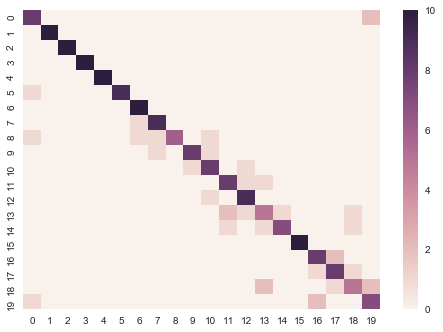

In [20]:
sns.heatmap(cm)

C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  if __name__ == '__main__':


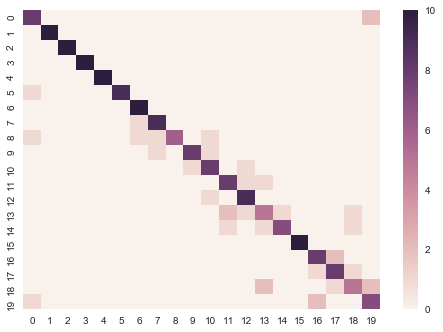

In [21]:
cm2 = randomSplitCM(data2, 'LR', 10, c=1.0)
sns.heatmap(cm2)

Term Frequency feature encoding:
( 9 and 7) , (3 and 4), ( 1 and 3) are examples of classes that get confused with each other.
For example in class three, only three documents predicted right, while 5 documents that were in class three predicted as class 4 wrongly. Vice versa, 11 documents predicted as class three while they were class 4. Only three documents predicted for class four right. 
For this part, I tested my code for 2,000 documents!

Boolean:
Document 7 and 8 are examples of classes that get confused with each other

In [22]:
#features_df= data.ix[:, (x for x in range(len(data.columns)-2))]
##Using DataFrame.drop
 #   df.drop(df.columns[[1, 2]], axis=1, inplace=True)

    # drop by Name
  #  df1 = df1.drop(['B', 'C'], axis=1)
#feature_precentage = np.linspace(0.1, 1, 10, endpoint=True)
#features_df= data.ix[:, (x for x in range(len(data.columns)-2))]
#print (features_df)
#len(features_df.columns)*feature_precentage

In [23]:
#df1 = data.drop(['target', 'label'], axis=1)
#features_df= df1.ix[:, (x for x in range(len(df1.columns)))]
#features_df= df1.iloc[:, :]
#feature_count= len(features_df.columns)*feature_precentage

#int_feature_count=[]
#for i in feature_count:
 #   int_feature_count.append(int(i))
  

## Q2

### (a)

In [24]:
def featureSizeAC(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        train_mean_fs: list.
        train_ci_fs: list.
        test_mean_fs: list.
        test_ci_fs: list.
        
    """
    feature_precentage = np.linspace(0.1, 1, 10, endpoint=True)
    
    
    ########### your code goes here ###########
    train_ci_fs=[]
    test_ci_fs=[]
    train_mean_fs=[]
    test_mean_fs=[]
    
    #cms= {}
    df1 = data.drop(['target', 'label'], axis=1)
    #features_df= df1.ix[:, (x for x in range(len(df1.columns)))]
    feature_count= len(df1.columns)*feature_precentage
    int_feature_count=[]
    
    for i in feature_count:
        int_feature_count.append(int(i))
    
    for i in int_feature_count:
        features_df= df1.iloc[:, 0:i]  
        features = features_df.as_matrix()
        
    # select target attribute from pandas and convert into numpy array
        target_df = data['target']
        target = target_df.as_matrix()
    # <help:scikit_cross_validation>
    # use log reg classifier
        if clf=="LR":
            clf = LogisticRegression(C=params["c"])
        elif clf =="NB":
            clf=GaussianNB()
        elif clf=="SVM":
            clf=SVC()      
        
        
        cv = StratifiedKFold(target, n_folds= num_run)
        for i, (train, test) in enumerate(cv):
    # train then immediately predict the test set
            clfModel = clf.fit(features[train], target[train])
            target_pred_test = clfModel.predict(features[test])
    # stash the overall accuracy on the test set for the fold too
            test_scores.append(metrics.accuracy_score(target[test], target_pred_test))
            target_pred_train = clfModel.predict(features[train])
    # stash the overall accuracy on the test set for the fold too
            train_scores.append(metrics.accuracy_score(target[train], target_pred_train))
        train_ci_fs.append(mean_confidence_interval(train_scores, confidence=0.95)[1])
        test_ci_fs.append(mean_confidence_interval(test_scores, confidence=0.95)[1])
        test_mean_fs.append(mean_confidence_interval(test_scores, confidence=0.95)[0])
        train_mean_fs.append(mean_confidence_interval(train_scores, confidence=0.95)[0])
    
      ###########         end         ###########
    return train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs

In [25]:
train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs = featureSizeAC(data, 'LR', 10, c=1.0)
print (train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs)

[0.6527777777777779, 0.56925925925925935, 0.57152777777777775, 0.61722222222222223, 0.66324074074074069, 0.70531746031746023, 0.7401388888888889, 0.76783950617283947, 0.79038888888888892, 0.80909090909090886] [0.13251190250378297, 0.094430186996957099, 0.070308565175766544, 0.060056799853019364, 0.054609232383434764, 0.051021710563311028, 0.047752767771682858, 0.044559938931204399, 0.041607163565188156, 0.038933125426234137] [0.27250000000000002, 0.22666666666666666, 0.21375000000000002, 0.22500000000000001, 0.23833333333333334, 0.26142857142857134, 0.28062500000000001, 0.29666666666666663, 0.312, 0.32227272727272738] [0.068032155480772627, 0.051501192489662388, 0.039488404243228567, 0.03225845098240402, 0.028488704533459863, 0.028033318494180559, 0.026901398253223994, 0.025547552925733682, 0.024628612354726472, 0.023425032343315937]


### (b)

In [26]:
def featureSizePlot(feature_size, train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(feature_size, test_mean_fs, color=sns.xkcd_rgb["pale red"], yerr=test_ci_fs)
    train_curve=plt.errorbar(feature_size, train_mean_fs,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_fs)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Feature Percentage')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Feature Size")
    plt.show()

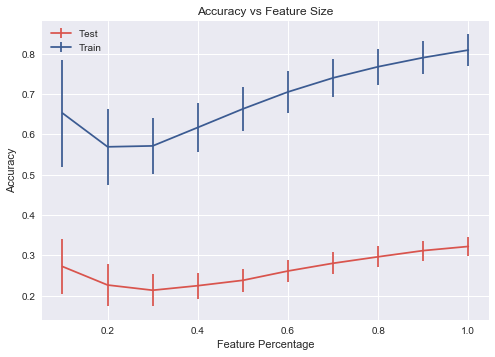

In [27]:
featureSizePlot(np.linspace(0.1, 1, 10, endpoint=True),train_mean_fs, train_ci_fs, test_mean_fs, test_ci_fs )

The plot shows when we only have 20 features for 2000 dataset, the accuracy of train and test dataset is closer to each other; however, the value of accuracy is very low.
By increasing the feature size to 60, accuracy increased in high rate. The accuracy for teasting dataset did not change much when we changed the feature size from 60 to 100; however its confidence interval decreased.
In overal, we can observe that when feature size increases, the difference between accuracy of training data set and testing data also increase, which shows the model is not reliable with large feature size.


## Q3

In [28]:
def hyperParameterAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
    
    OUTPUT
        test_mean_hp: list.  mean accuracy list of test
        test_ci_hp: list. confidence interval list of test
        train_mean_hp: list. mean accuracy list of train
        train_ci_hp: list. confidence interval list of train
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """
    params = np.logspace(-4, 4, num=9)
    #param_grid = {'C': params }
    #clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
    ########### your code goes here ###########
    df1 = data.drop(['target', 'label'], axis=1)
    features_df= df1.iloc[:, :]
    features = features_df.as_matrix()
    features[:10]

    # select target attribute from pandas and convert into numpy array
    target_df = data['target']
    target = target_df.as_matrix()
    target
    labels = data['target'].unique()

    # <help:scikit_cross_validation>
    # use log reg classifier
    
    train_mean_hp=[]
    train_ci_hp=[]
    test_mean_hp=[]
    test_ci_hp=[]

    #cms= {}
    
    for i in params.tolist(): 
        if clf== "LR":
            clf= LogisticRegression(C = i ,random_state = 42)
        elif clf== "NB":
            clf=GaussianNB(C = i ,random_state = 0)
        elif clf== "SVM":   
            clf=SVC(C = i ,random_state = 0)

        cv = StratifiedKFold(target, n_folds= num_run)
        for i, (train, test) in enumerate(cv):
    # train then immediately predict the test set
            clfModel = clf.fit(features[train], target[train])
            target_pred_test = clfModel.predict(features[test])
    # stash the overall accuracy on the test set for the fold too
            test_scores.append(metrics.accuracy_score(target[test], target_pred_test))
            target_pred_train = clfModel.predict(features[train])
    # stash the overall accuracy on the test set for the fold too
            train_scores.append(metrics.accuracy_score(target[train], target_pred_train))
        train_ci_hp.append(mean_confidence_interval(train_scores, confidence=0.95)[1])
        test_ci_hp.append(mean_confidence_interval(test_scores, confidence=0.95)[1])
        test_mean_hp.append(mean_confidence_interval(test_scores, confidence=0.95)[0])
        train_mean_hp.append(mean_confidence_interval(train_scores, confidence=0.95)[0])
    #print (train_hp, test_hp)
    ###########         end         ###########
    return train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp

In [29]:
train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp = hyperParameterAC(data, 'LR', 10)
print (train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp)

[0.7657870370370371, 0.72914529914529913, 0.69773809523809527, 0.67051851851851851, 0.64670138888888884, 0.62568627450980385, 0.6070061728395062, 0.59029239766081865, 0.57524999999999993] [0.041785329715242292, 0.042750623778147569, 0.042739703079457014, 0.042194792734013296, 0.041354063899844154, 0.040353781342225309, 0.039274880338120731, 0.03816651064227574, 0.037058810588523942] [0.31208333333333338, 0.3034615384615385, 0.29607142857142854, 0.28966666666666668, 0.2840625, 0.27911764705882353, 0.2747222222222222, 0.27078947368421052, 0.26724999999999999] [0.022123495612800168, 0.020924022443184229, 0.019827226902589239, 0.018827111951416193, 0.01791531081971668, 0.017082999834245004, 0.016321739322300743, 0.015623809379482248, 0.01498230660372738]


In [30]:
def hyperParameterPlot(params, train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(params, test_mean_hp, color=sns.xkcd_rgb["pale red"], yerr=test_ci_hp)
    train_curve=plt.errorbar(params, train_mean_hp,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_hp)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Parameter')
    plt.xscale("log")
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Parameters")
    plt.show()

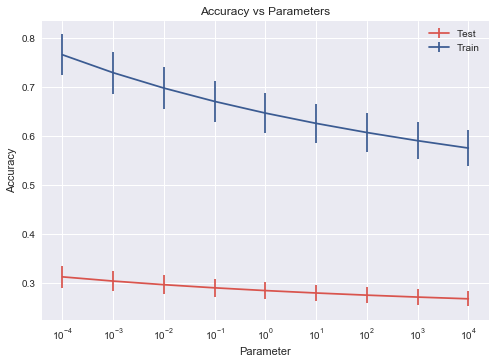

In [31]:
hyperParameterPlot(np.logspace(-4, 4, num=9),train_mean_hp, train_ci_hp, test_mean_hp, test_ci_hp )

## Q4

### (a)

In [32]:
def dataSizeAC(data, clf, num_run):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        test_mean_ds: list.  mean accuracy list of test
        test_ci_ds: list. confidence interval list of test
        train_mean_ds: list. mean accuracy list of train
        train_ci_ds: list. confidence interval list of train
        
        
        
    NOTE 
        randomSplitCI could be the sub-route of this function
    """
    data_precentage = np.linspace(0.1, 1, 10, endpoint=True)
    
    ########### your code goes here ###########
    from sklearn.utils import shuffle
    
    if clf=="LR":
        clf = LogisticRegression()
    elif clf =="NB":
        clf=GaussianNB()
    elif clf=="SVM":
        clf=SVC()
        
    train_mean_ds=[]
    train_ci_ds =[]
    test_mean_ds=[]
    test_ci_ds=[]
    train_ds=[]
    test_ds=[]
    
    df1 = data.drop(['target', 'label'], axis=1)
    features_df= df1.iloc[:, :]  
    features = features_df.as_matrix()
   
    # select target attribute from pandas and convert into numpy array
    target_df = data['target']
    target = target_df.as_matrix()
    labels = data['target'].unique()
    
    
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42) 
    for i in data_precentage:
        for j in range(1, num_run+1):
            features_train2, features_test2, target_train2, target_test2 = train_test_split(features_train, target_train, test_size=1-i, random_state=42) 
            clfModel = clf.fit(features_train2, target_train2)
    # predict target with feature test set using trained model
            target_pred_test = clfModel.predict(features_test)      
        
            test_scores.append(metrics.accuracy_score(target_test, target_pred_test))
            target_pred_train = clfModel.predict(features_train2)
    # stash the overall accuracy on the test set for the fold too
            train_scores.append(metrics.accuracy_score(target_train2, target_pred_train))
        train_ci_ds.append(mean_confidence_interval(train_scores, confidence=0.95)[1])
        test_ci_ds.append(mean_confidence_interval(test_scores, confidence=0.95)[1])
        test_mean_ds.append(mean_confidence_interval(test_scores, confidence=0.95)[0])
        train_mean_ds.append(mean_confidence_interval(train_scores, confidence=0.95)[0])
    ###########         end         ###########
    return train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds

In [33]:
train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds = dataSizeAC(data, 'LR', 3)
print (train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds)

[0.58152709359605903, 0.58762135922330094, 0.59354066985645926, 0.59929245283018862, 0.60488372093023246, 0.61032110091743108, 0.61561085972850671, 0.62075892857142845, 0.6257709251101321, 0.6306521739130434] [0.036989341338443185, 0.036902291623773883, 0.036799694977347225, 0.036683352876694858, 0.036554864927336048, 0.036415654482099727, 0.036266990494422197, 0.036110006244359907, 0.035945715452550979, 0.035775026200688807] [0.26527093596059109, 0.26456310679611644, 0.26459330143540671, 0.26485849056603777, 0.26441860465116285, 0.26559633027522939, 0.26606334841628965, 0.26629464285714283, 0.26674008810572686, 0.26782608695652177] [0.01487837509082323, 0.014676036062671701, 0.014464465581348583, 0.014261092979538509, 0.014067410219940492, 0.013917767351072988, 0.013735167698615155, 0.013552221511934952, 0.013379038335309821, 0.013243837056797743]


### (b)

In [34]:
def dataSizePlot(datasize, train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds):
    # First illustrate basic pyplot interface, using defaults where possible.
    plt.figure()
    test_curve=plt.errorbar(datasize, test_mean_ds, color=sns.xkcd_rgb["pale red"], yerr=test_ci_ds)
    train_curve=plt.errorbar(datasize, train_mean_ds,color=sns.xkcd_rgb["denim blue"], yerr=train_ci_ds)
    plt.legend([test_curve, train_curve], ['Test', 'Train'])
    plt.xlabel('Data Percentage')
    plt.ylabel('Accuracy')
    plt.title("Accuracy vs Data Percentage")
    plt.show()

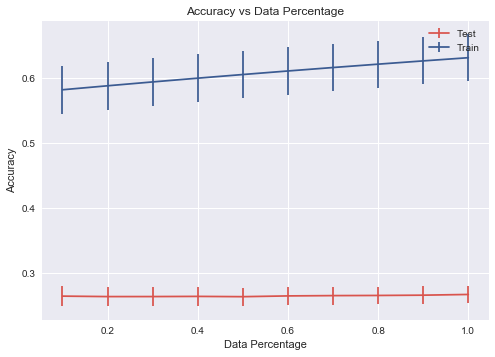

In [35]:
dataSizePlot(np.linspace(0.1, 1, 10, endpoint=True),train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds)

## Q5

### (a)

In [36]:
data.head(n=1)

,edu,x,cmu,cs,com,news,srv,1,net,cantaloupe,...,entry,us,mail,distribution,20,christian,printf,used,target,label
0,5,0,4,3,1,3,3,1,1,2,...,0,1,1,0,0,0,0,5,0,20_newsgroups\alt.atheism\51060


In [37]:
data2.head(n=1)

,edu,x,cmu,cs,com,news,srv,1,net,cantaloupe,...,approved,call,michael,future,words,method,nice,1993apr15,target,label
0,1,0,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,0,0,0,20_newsgroups\alt.atheism\51060


### (b)

You should be able to get this answer easily by running dataPreprocessor fuction and randomSplitCI function

In [38]:
train_scores1,test_scores1,train_mean1,test_mean1,train_ci1,test_ci1 = randomSplitCI(data, 'LR', 10, c=1.0)
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores1, train_mean1, train_ci1)
     )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores1, test_mean1, test_ci1)
     )

Train    
Result of trails:[0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 0.99444444444444446, 1.0, 1.0, 1.0, 0.99444444444444446, 0.99444444444444446]     
Average Accuracy: 0.9961111111111112     
Confidence Interval: 0.001459169831581765

Test    
Result of trails:[0.59999999999999998, 0.29999999999999999, 0.34999999999999998, 0.5, 0.40000000000000002, 0.25, 0.45000000000000001, 0.45000000000000001, 0.5, 0.45000000000000001]     
Average Accuracy: 0.425     
Confidence Interval: 0.05623012757531839


In [39]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data2, 'LR', 10, c=1.0)
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
     )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
     )

Train    
Result of trails:[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]     
Average Accuracy: 1.0     
Confidence Interval: 0.0

Test    
Result of trails:[0.75, 0.94999999999999996, 0.84999999999999998, 0.69999999999999996, 0.84999999999999998, 0.90000000000000002, 0.80000000000000004, 0.84999999999999998, 0.90000000000000002, 0.69999999999999996]     
Average Accuracy: 0.825     
Confidence Interval: 0.04665107341344332


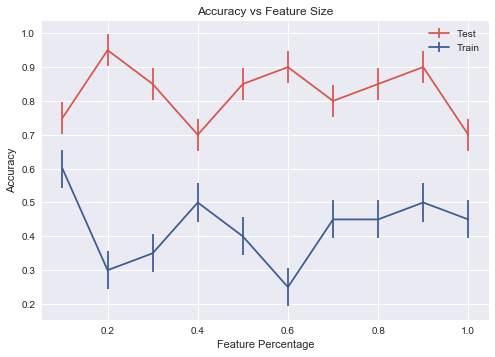

In [40]:
featureSizePlot(np.linspace(0.1, 1, 10, endpoint=True),test_scores1, test_ci1, test_scores, test_ci)

Boolean feature encoding performed better (7 % higher test accuracy).
Some words are rare, or some documents may have smaller length. These factors lead to lower word frequency for these types of documents. Eventhough these documents are relevent to a specific class, they do not classified correctly due to low related word count.

## Q6

### (a)

In [41]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'LR', 10, c=1.0)

In [42]:
train_scores2,test_scores2,train_mean2,test_mean2,train_ci,test_ci2 = randomSplitCI(data, 'NB', 10, c=1.0)

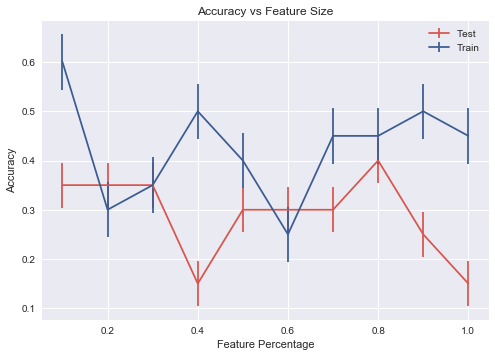

In [43]:
featureSizePlot(np.linspace(0.1, 1, 10, endpoint=True),test_scores, test_ci, test_scores2, test_ci2)

In [44]:
assert(isinstance(data, pd.DataFrame)), "data should be pandas dataframe type"

In [52]:
assert(isinstance(train_scores, list)), "train_scores should be list type"
assert(isinstance(test_scores, list)), "test_scores should be list type"
assert(isinstance(train_mean, float)), "train_mean should be float type"
assert(isinstance(test_mean, float)), "test_mean should be float type"
assert(isinstance(train_ci, float)), "train_ci should be float type"
assert(isinstance(test_ci, float)), "test_ci should be float type"

In [53]:
assert(isinstance(cm, pd.DataFrame)), "Confusion matrix should be pandas dataframe type"

In [54]:
assert(isinstance(train_mean_fs, list)), "train_mean_fs should be list type"
assert(isinstance(test_mean_fs, list)), "test_mean_fs should be list type"
assert(isinstance(train_ci_fs, list)), "train_ci_fs should be list type"
assert(isinstance(test_ci_fs, list)), "test_ci_fs should be list type"
assert(len(train_mean_fs)==len(train_ci_fs)), \
"list length of mean and confidence interval are not equal(train)"
assert(len(test_mean_fs)==len(test_ci_fs)), \
"list length of mean and confidence interval are not equal(test)"

In [55]:
assert(isinstance(train_mean_hp, list)), "train_mean_hp should be list type"
assert(isinstance(test_mean_hp, list)), "test_mean_hp should be list type"
assert(isinstance(train_ci_hp, list)), "train_ci_hp should be list type"
assert(isinstance(test_ci_hp, list)), "test_ci_hp should be list type"
assert(len(train_mean_hp)==len(train_ci_hp)), \
"list length of mean and confidence interval are not equal(train)"
assert(len(test_mean_hp)==len(test_ci_hp)), \
"list length of mean and confidence interval are not equal(test)"

In [56]:
train_mean_ds, train_ci_ds, test_mean_ds, test_ci_ds
assert(isinstance(train_mean_ds, list)), "train_mean_ds should be list type"
assert(isinstance(test_mean_ds, list)), "test_mean_ds should be list type"
assert(isinstance(train_ci_ds, list)), "train_ci_ds should be list type"
assert(isinstance(test_ci_ds, list)), "test_ci_ds should be list type"
assert(len(train_mean_ds)==len(train_ci_ds)), \
"list length of mean and confidence interval are not equal(train)"
assert(len(test_mean_ds)==len(test_ci_ds)), \
"list length of mean and confidence interval are not equal(test)"